# ROOT histogram from rhapi data

In [2]:
from rhapi import RhApi
import numpy as np
from io import StringIO
import pandas as pd
import ROOT
import math

%matplotlib inline

In [5]:
url = "http://dbloader-tracker.cern.ch/trk_rhapi"
rh = RhApi(url, debug = False)

Selecting some data for a part

In [7]:
sn = '33234-001-PSS-MAINA'
df = pd.read_csv(StringIO(rh.csv("select c.VOLTS, c.CURRNT_NAMP from trker_int2r.c1020 c where c.PART_SERIAL_NUMBER = :a order by c.VOLTS", {'a': sn})), sep=",")
ds = df['CURRNT_NAMP']
ds.describe()

count     51.000000
mean     102.228078
std       18.856093
min        6.162000
25%       93.510000
50%      106.500000
75%      113.840000
max      121.950000
Name: CURRNT_NAMP, dtype: float64

Draw ROOT histogram

In [8]:
histo = ROOT.TH1F("histo", "Sensor current", 50, math.floor(de.min()), math.ceil(de.max()))
for i in ds: histo.Fill(i)

c = ROOT.TCanvas("canvas", "", 800, 600)
histo.Draw()
c.Draw()

Fiting normal distribution to data

In [9]:
histo.Fit("gaus", "S")
c.Draw()

 FCN=7.17058 FROM MIGRAD    STATUS=CALL LIMIT   1354 CALLS        1355 TOTAL
                     EDM=0.000231644    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  16.3 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.56565e+03   2.58415e+04   3.62974e+02  -1.79463e-05
   2  Mean         5.52701e+02   2.85653e+02   5.09979e+00   3.80532e-03
   3  Sigma        1.12770e+02   4.61597e+01   9.69093e-03  -1.33012e+00


Warning in <Fit>: Abnormal termination of minimization.


And C++ code

 FCN=7.17112 FROM MIGRAD    STATUS=CALL LIMIT   1345 CALLS        1346 TOTAL
                     EDM=0.000134054    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  30.6 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.88574e+03   2.48587e+04   1.36816e+02  -1.72682e-05
   2  Mean         5.45113e+02   3.13360e+02   1.56720e+00   3.34985e-03
   3  Sigma        1.11638e+02   5.02991e+01   2.46024e-03  -1.19970e+00


Warning in <Fit>: Abnormal termination of minimization.


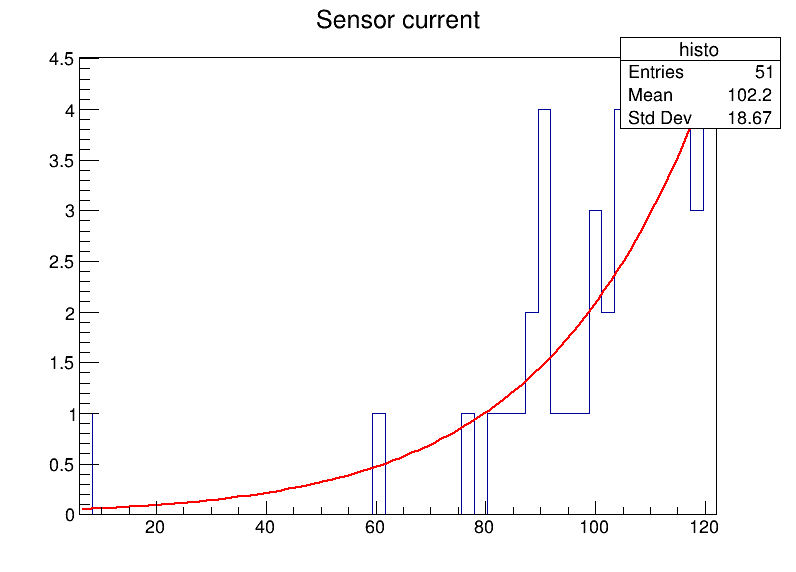

In [10]:
%%cpp
histo->Fit("gaus", "S");
canvas->Draw();